<font size="3"><strong>Link to task:</strong></font>  
https://datahack.analyticsvidhya.com/contest/janatahack-machine-learning-for-banking/True/#ProblemStatement  

<font size="3"><strong>Description of the problem</strong></font>  
Banks offer various kinds of accounts and provide loans based on the requirements.

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

You can use any combination of the features in the dataset to make your loan rate category predictions. Some features will be easier to use than others.

<font size="3"><strong>My goal:</strong></font>
The goal of problem is to predict the  loan rate rate categories (1-3) for each data based on the sets provided on the page. In this project I would like compare the accurancy of diffrent machine learning algorithms such as Logistic Regression, Decision Trees or Naive Bayesian classifier and select the best of them for this problem.

<strong>Algorithms used:</strong> Logistic Regression, Decision Trees, Naive Bayesian classifier, Multiple imputation

In [153]:
import miceforest as mf #provide Multiple imputation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
#read the data and first look at data
df = pd.read_csv("train_fNxu4vz.csv")
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [155]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [156]:
#print unique value for each variable
for column in df.columns:
    if isinstance(column, object):
        print(column, "\n", df[column].unique(), "\n")

Loan_ID 
 [10000001 10000002 10000003 ... 10164307 10164308 10164309] 

Loan_Amount_Requested 
 ['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825'] 

Length_Employed 
 ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years'] 

Home_Owner 
 ['Rent' 'Mortgage' nan 'Own' 'Other' 'None'] 

Annual_Income 
 [68000.      nan 75566.4 ... 51024.  28721.4 24864. ] 

Income_Verified 
 ['not verified' 'VERIFIED - income' 'VERIFIED - income source'] 

Purpose_Of_Loan 
 ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy'] 

Debt_To_Income 
 [18.37 14.93 15.88 ... 38.03 39.04 35.06] 

Inquiries_Last_6Mo 
 [0 3 1 2 4 5 6 7 8] 

Months_Since_Deliquency 
 [ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15

In [157]:
#Loan_Amount_Requested is a numerical variable, but written as: for example 7,000 and this must be converted to 7000
#covert to numerical values
series = df["Loan_Amount_Requested"]
s = series.str.contains(',', regex=False)

df["Loan_Amount_Requested"] = df["Loan_Amount_Requested"].str.replace(",","")
df["Loan_Amount_Requested"] = pd.to_numeric(df["Loan_Amount_Requested"])

df["Annual_Income"] = pd.to_numeric(df["Annual_Income"])
df["Debt_To_Income"] = pd.to_numeric(df["Debt_To_Income"])
df["Inquiries_Last_6Mo"] = pd.to_numeric(df["Inquiries_Last_6Mo"])
df["Months_Since_Deliquency"] = pd.to_numeric(df["Months_Since_Deliquency"])
df["Number_Open_Accounts"] = pd.to_numeric(df["Number_Open_Accounts"])
df["Total_Accounts"] = pd.to_numeric(df["Total_Accounts"])

In [158]:
df["Loan_ID"] = pd.to_numeric(df["Loan_ID"])
df["Loan_ID"] = pd.to_numeric(df["Loan_ID"])

In [159]:
df = df.replace({'Length_Employed': {'< 1 year': 0, '1 year': 1, '2 years': 2,'3 years': 3,
                                '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                '8 years': 8, '9 years': 9, '10+ years': 10 }, 
                 "Home_Owner": {'Mortgage': 0, 'Rent': 1, 'Own': 2, 'Other': 3, 'None': 4, None: 4},
                 "Gender": {'Female':0, 'Male':1 }
                }
               )

In [160]:
#perform a correlation matrix
df.corr()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
Loan_ID,1.000000,0.001305,0.000152,-0.001693,0.008326,-0.001320,0.002593,0.002111,0.004626,0.005331,0.003377,0.001290
Loan_Amount_Requested,0.001305,1.000000,0.119178,-0.072685,0.337695,0.058314,-0.007659,-0.044224,0.203087,0.233424,0.001468,0.132486
Length_Employed,0.000152,0.119178,1.000000,-0.055969,0.069505,0.049020,-0.006522,-0.012635,0.037321,0.111460,-0.000136,0.030404
Home_Owner,-0.001693,-0.072685,-0.055969,1.000000,-0.061771,0.009191,-0.016566,0.020010,-0.046803,-0.077248,-0.001086,0.021578
Annual_Income,0.008326,0.337695,0.069505,-0.061771,1.000000,-0.173589,0.060011,-0.057804,0.145822,0.203237,0.001538,-0.052783
Debt_To_Income,-0.001320,0.058314,0.049020,0.009191,-0.173589,1.000000,-0.005142,0.006394,0.302442,0.229871,-0.000392,0.152472
Inquiries_Last_6Mo,0.002593,-0.007659,-0.006522,-0.016566,0.060011,-0.005142,1.000000,0.011971,0.100930,0.131467,0.000556,0.188987
Months_Since_Deliquency,0.002111,-0.044224,-0.012635,0.020010,-0.057804,0.006394,0.011971,1.000000,-0.049683,-0.062261,-0.000934,-0.042108
Number_Open_Accounts,0.004626,0.203087,0.037321,-0.046803,0.145822,0.302442,0.100930,-0.049683,1.000000,0.682137,0.001292,0.002847
Total_Accounts,0.005331,0.233424,0.111460,-0.077248,0.203237,0.229871,0.131467,-0.062261,0.682137,1.000000,0.003024,-0.040690


In [161]:
#Perform categorical variables as 0 and 1
df = pd.get_dummies(df, columns = ["Purpose_Of_Loan","Income_Verified"])

In [162]:
#data set contains many missing value so it's a good idea to imput them
print(len(df), "\n")
print(df.isna().sum())

164309 

Loan_ID                                         0
Loan_Amount_Requested                           0
Length_Employed                              7371
Home_Owner                                      0
Annual_Income                               25102
Debt_To_Income                                  0
Inquiries_Last_6Mo                              0
Months_Since_Deliquency                     88379
Number_Open_Accounts                            0
Total_Accounts                                  0
Gender                                          0
Interest_Rate                                   0
Purpose_Of_Loan_car                             0
Purpose_Of_Loan_credit_card                     0
Purpose_Of_Loan_debt_consolidation              0
Purpose_Of_Loan_educational                     0
Purpose_Of_Loan_home_improvement                0
Purpose_Of_Loan_house                           0
Purpose_Of_Loan_major_purchase                  0
Purpose_Of_Loan_medical                  

In [163]:
df.describe()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,...,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Income_Verified_VERIFIED - income,Income_Verified_VERIFIED - income source,Income_Verified_not verified
count,1.643090e+05,164309.00000,156938.000000,164309.000000,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,...,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,14349.33692,5.993201,1.111710,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,...,0.009379,0.005928,0.050795,0.000749,0.014558,0.005094,0.005039,0.361642,0.322654,0.315704
std,4.743207e+04,8281.86870,3.628592,1.371902,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,...,0.096389,0.076764,0.219579,0.027350,0.119775,0.071191,0.070809,0.480477,0.467493,0.464797
min,1.000000e+07,500.00000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.004108e+07,8000.00000,3.000000,0.000000,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.008216e+07,12075.00000,6.000000,1.000000,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.012323e+07,20000.00000,10.000000,1.000000,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.016431e+07,35000.00000,10.000000,4.000000,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
#use mean to fill Missing Data
#df["Months_Since_Deliquency"] = df["Months_Since_Deliquency"].fillna(df["Months_Since_Deliquency"].mean())

In [165]:
kds = mf.KernelDataSet(
    df[list(set(df.columns) - set(['Interest_Rate']))],
    save_all_iterations=True,
    random_state=1991
)

kds.mice(5)

# Return the completed kernel data
df[list(set(df.columns) - set(['Interest_Rate']))] = kds.complete_data()
print(kds)

              Class: KernelDataSet
         Iterations: 5
  Imputed Variables: 3
save_all_iterations: True


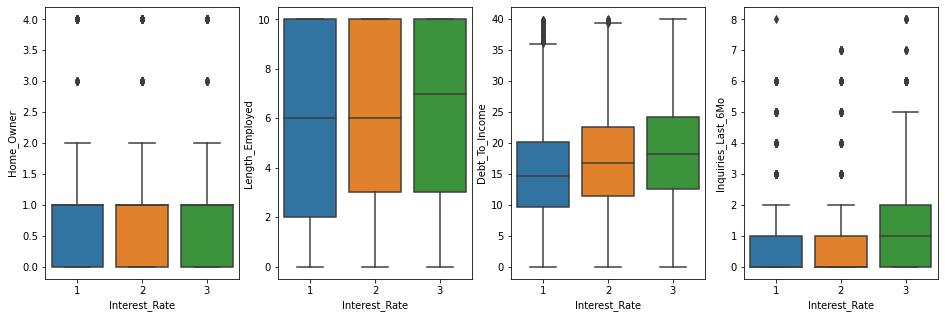

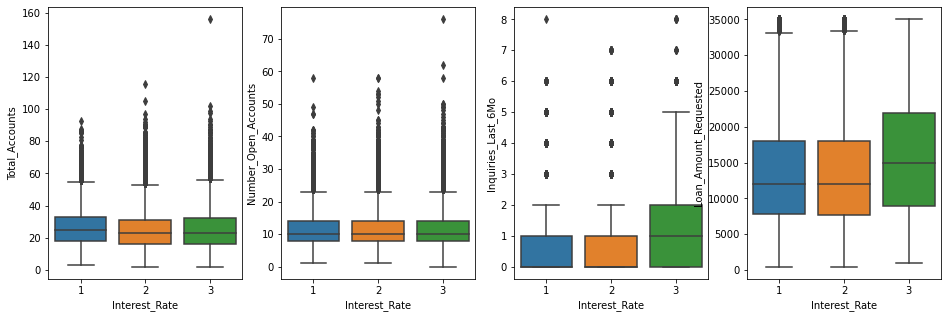

In [166]:
#boxplots is similar for Home_Owner, Length_Employed,Total_Accounts,Number_Open_Accounts
f, axes = plt.subplots(1, 4,sharex=True, figsize=(16,5))
sns.boxplot(x="Interest_Rate", y="Home_Owner", data=df,ax=axes[0])
sns.boxplot(x="Interest_Rate", y="Length_Employed", data=df,ax=axes[1])
sns.boxplot(x="Interest_Rate", y="Debt_To_Income", data=df,ax=axes[2])
sns.boxplot(x="Interest_Rate", y="Inquiries_Last_6Mo", data=df,ax=axes[3])
f, axes = plt.subplots(1, 4,sharex=True, figsize=(16,5))
sns.boxplot(x="Interest_Rate", y="Total_Accounts", data=df,ax=axes[0])
sns.boxplot(x="Interest_Rate", y="Number_Open_Accounts", data=df,ax=axes[1])
ax = sns.boxplot(x="Interest_Rate", y="Inquiries_Last_6Mo", data=df,ax=axes[2])
ax = sns.boxplot(x="Interest_Rate", y="Loan_Amount_Requested", data=df,ax=axes[3])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Months_Since_Deliquency'>

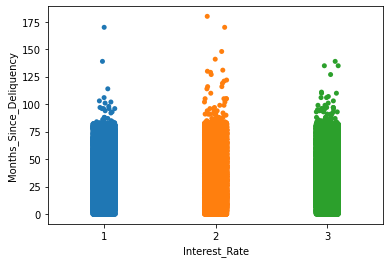

In [167]:
sns.stripplot(x="Interest_Rate", y="Months_Since_Deliquency", data=df)

<AxesSubplot:xlabel='Interest_Rate', ylabel='Annual_Income'>

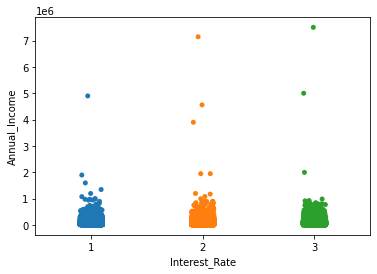

In [168]:
sns.stripplot(x="Interest_Rate", y="Annual_Income", data=df)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
df = df.sample(frac=1)
col = list(set(df.columns) - set(['Interest_Rate',"Loan_ID"]))
X = df[col]
y = df['Interest_Rate']


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [191]:
gnb = GaussianNB()
y_pred_train = gnb.fit(X_train, y_train).predict(X_train)
y_pred = gnb.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix for train set")
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print("Confusion matrix for test set")
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

Confusion matrix for train set
[[  992 19162  3511]
 [ 1043 39128  9254]
 [  647 27015 14264]]
Confusion matrix for test set
[[  402  8169  1570]
 [  405 16735  4015]
 [  304 11581  6112]]


Text(0.5, 1.0, 'Confusion Matrix')

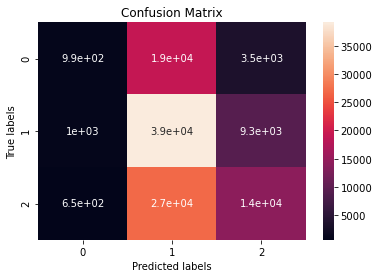

In [193]:
ax= plt.subplot()
sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

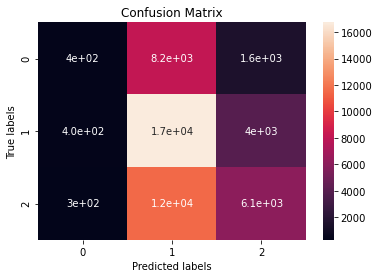

In [194]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [195]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4716491185361005


In [196]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
y_pred_train2 = model.fit(X_train, y_train).predict(X_train)
y_pred2 = model.fit(X_train, y_train).predict(X_test)

In [197]:
print("Confusion matrix for train set")
cm = confusion_matrix(y_train, y_pred_train2)
print(cm)
print("Confusion matrix for test set")
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

Confusion matrix for train set
[[   75 18287  5303]
 [   91 36154 13180]
 [   78 25068 16780]]
Confusion matrix for test set
[[   38  7826  2277]
 [   34 15476  5645]
 [   30 10763  7204]]


Text(0.5, 1.0, 'Confusion Matrix')

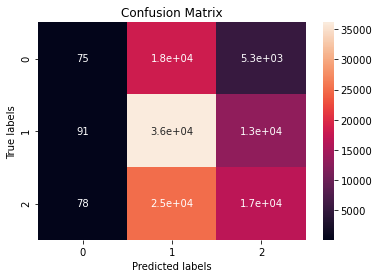

In [198]:
ax= plt.subplot()
sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

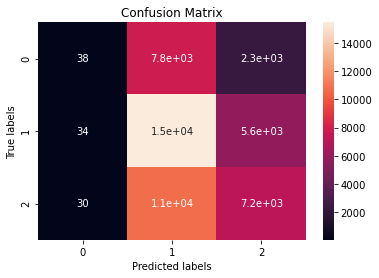

In [199]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [200]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.4608767979226259


In [201]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
y_pred_train3 = model.fit(X_train, y_train).predict(X_train)
y_pred3 = model.fit(X_train, y_train).predict(X_test)

In [202]:
print("Confusion matrix for train set")
cm = confusion_matrix(y_train, y_pred_train3)
print(cm)
print("Confusion matrix for test set")
cm2 = confusion_matrix(y_test, y_pred3)
print(cm2)

Confusion matrix for train set
[[   75 18287  5303]
 [   91 36154 13180]
 [   78 25068 16780]]
Confusion matrix for test set
[[   38  7826  2277]
 [   34 15476  5645]
 [   30 10763  7204]]


Text(0.5, 1.0, 'Confusion Matrix')

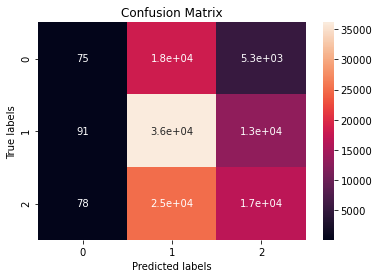

In [203]:
ax= plt.subplot()
sns.heatmap(cm, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

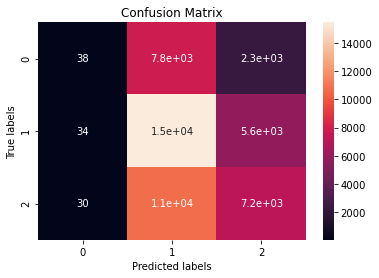

In [204]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.4608767979226259


In [206]:
col = list(set(df.columns) - set(['Interest_Rate',"Loan_ID"]))
X = df[col]
y = df['Interest_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [263]:
col1 = list(set(X.columns) - set(["Annual_Income","Number_Open_Accounts","Purpose_Of_Loan_vacation",
                                 ]))
X_train1 = X_train[col1]
X_test1 = X_test[col1]
gnb = GaussianNB()
y_pred_train = gnb.fit(X_train1, y_train).predict(X_train1)
y_pred = gnb.predict(X_test1)


In [264]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49850891607327613
